In [ ]:
from os import path
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


시언이가 만든 임베딩 class, vector에 분류기 붙여서 성능 확인

# 1. 임베딩

In [ ]:
!pip install pickle5
import pickle5 as pickle
import gensim
import pandas as pd
import numpy as np
from gensim.models import doc2vec
from collections import namedtuple

class Doc2Vec_tool:
  def __init__(self):
    self.spi = [82.5, 83.4, 83.9, 84.1, 84.4, 84.8, 85.4, 86 ,85.9, 85.4, 84.7, 85.4, 85.5, 85.3, 84.9, 84.9, 84.4, 83.8, 83.7, 83.8, 83.7, 83.3,82.3,
                83.3, 83.4, 83.8, 84, 84.1, 83.8, 84.4, 84.8,85.4, 85.9, 85.8, 85.5, 86.2, 86.7, 87.3, 87.2, 87.2, 87.4, 87.7, 88.4, 89.1, 89.7,89.9,
                90.1,90.7, 91.3, 92.1, 92.8, 93.4, 93.9, 94.7, 95.4, 96, 96.4, 96.4, 95.7, 95.6, 95.8, 95.6, 95.6, 95.6, 96, 96.5, 97.1, 97.9, 98.5,98.6,
                98.2,98, 98.3, 98.4, 98.3, 98.6, 99.2, 99.9, 100.1, 100.2, 100.3, 100, 99.7, 99.9, 100.4, 100.4, 100.5, 100.2, 100.1, 100.1, 101.2, 102.6,
                102.9, 102.2, 101.5, 101, 100.6, 99.9, 99.6, 99.5, 99.8, 100.2, 100.5, 100.9, 101.4, 102.3, 103.3, 104 ,105.4, 106.3, 106.3,107.1,
                109.2, 111.6, 113.1, 114, 115.6, 118.3, 121.4,124.9]

  def train_doc2vec(self, df,parameter):
    #parameter[0] = size, parameter[1] = window, parameter[2] = min_count
    train_df = df[:90]
    docs = []
    analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
    for i, text in enumerate(train_df['refined']):
        tags = [i]
        docs.append(analyzedDocument(text, tags))
        print("===임베딩 중=== {}번째 행".format(i))
    
    #학습
    max_epochs = 10
    vec_size = parameter[0]
    alpha = 0.025

    self.model = doc2vec.Doc2Vec(size=parameter[0],
                    alpha=alpha, 
                    window=parameter[1],
                    min_alpha=0.00025,
                    min_count=parameter[2],
                    workers = 4)
      
    self.model.build_vocab(docs)

    for epoch in range(max_epochs):
        print('iteration {0}'.format(epoch))
        self.model.train(docs,
                    total_examples=self.model.corpus_count,
                    epochs=self.model.iter)
        # decrease the learning rate
        self.model.alpha -= 0.0002
        # fix the learning rate, no decay
        self.model.min_alpha = self.model.alpha
    li = []
    for i in range(90):
      li.append(self.model.docvecs[i].tolist())
    ret_df = pd.DataFrame(li)
    ret_df['spi'] = self.spi[:90]
    return ret_df

  def test_doc2vec(self, df):
    test_df = raw_data[90:]
    test_li = []
    for i in range(90,120):
      test_li.append(self.model.infer_vector(test_df['refined'][i]).tolist())
    ret_df = pd.DataFrame(test_li)
    ret_df['spi'] = self.spi[90:]
    return ret_df



# 2. 데이터 불러오기


In [ ]:
with open('/content/drive/MyDrive/w2v_colab/불용어제거.pkl','rb') as fh:
    raw_data = pickle.load(fh)
doc_tool = Doc2Vec_tool()
vector_train = doc_tool.train_doc2vec(raw_data,[25,5,1])
vector_test = doc_tool.test_doc2vec(raw_data)
display(vector_train, vector_test)

===임베딩 중=== 0번째 행
===임베딩 중=== 1번째 행
===임베딩 중=== 2번째 행
===임베딩 중=== 3번째 행
===임베딩 중=== 4번째 행
===임베딩 중=== 5번째 행
===임베딩 중=== 6번째 행
===임베딩 중=== 7번째 행
===임베딩 중=== 8번째 행
===임베딩 중=== 9번째 행
===임베딩 중=== 10번째 행
===임베딩 중=== 11번째 행
===임베딩 중=== 12번째 행
===임베딩 중=== 13번째 행
===임베딩 중=== 14번째 행
===임베딩 중=== 15번째 행
===임베딩 중=== 16번째 행
===임베딩 중=== 17번째 행
===임베딩 중=== 18번째 행
===임베딩 중=== 19번째 행
===임베딩 중=== 20번째 행
===임베딩 중=== 21번째 행
===임베딩 중=== 22번째 행
===임베딩 중=== 23번째 행
===임베딩 중=== 24번째 행
===임베딩 중=== 25번째 행
===임베딩 중=== 26번째 행
===임베딩 중=== 27번째 행
===임베딩 중=== 28번째 행
===임베딩 중=== 29번째 행
===임베딩 중=== 30번째 행
===임베딩 중=== 31번째 행
===임베딩 중=== 32번째 행
===임베딩 중=== 33번째 행
===임베딩 중=== 34번째 행
===임베딩 중=== 35번째 행
===임베딩 중=== 36번째 행
===임베딩 중=== 37번째 행
===임베딩 중=== 38번째 행
===임베딩 중=== 39번째 행
===임베딩 중=== 40번째 행
===임베딩 중=== 41번째 행
===임베딩 중=== 42번째 행
===임베딩 중=== 43번째 행
===임베딩 중=== 44번째 행
===임베딩 중=== 45번째 행
===임베딩 중=== 46번째 행
===임베딩 중=== 47번째 행
===임베딩 중=== 48번째 행
===임베딩 중=== 49번째 행
===임베딩 중=== 50번째 행
===임베딩 중=== 51번째 행
===임베딩 중=== 52번째 행
===

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,spi
0,1.134719,-15.180132,0.181156,3.645660,1.661717,8.730867,-2.363755,8.489769,12.833738,12.805104,-5.296108,0.855744,10.388062,0.864560,7.494507,0.554937,-5.578986,-5.675434,5.289462,-5.429180,5.555854,5.108474,-11.610995,-2.611031,-4.695218,82.5
1,5.938670,-9.901203,-2.116284,5.951537,-0.169190,0.470918,-8.263319,0.098485,12.526738,9.945502,-6.856888,-5.083896,17.684011,4.838971,6.403310,-0.004578,-3.825764,-12.763455,-4.517279,-12.897778,16.072010,4.321612,-10.470653,2.928118,-8.613199,83.4
2,-0.328881,-11.796311,1.949470,-6.444148,-7.286949,7.836187,-15.006153,6.737123,5.577613,4.705746,2.359959,-5.059036,13.863451,-2.060064,16.157410,-10.301953,-3.563818,0.899929,2.599153,-8.919361,-5.407147,4.115539,-5.452252,0.270389,1.343265,83.9
3,4.128279,-20.751347,10.910960,3.968168,-6.879177,13.893252,-4.806592,5.966449,6.580198,16.833366,1.297247,0.457297,8.611665,4.059191,13.675839,4.117411,0.137333,-1.929878,3.450277,-2.218099,2.615773,6.857272,-3.283998,-7.086982,-5.761319,84.1
4,-9.962014,-22.004993,-7.828710,8.101979,-8.567517,1.080040,-13.577106,-2.924806,1.348308,-0.394808,-3.491145,-4.539094,6.294981,-4.569327,4.239801,-9.288949,-2.798534,-8.713958,-4.264359,-15.380173,3.984025,7.964366,0.326645,3.199588,-2.359767,84.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9.670637,-12.025821,4.513361,0.541492,5.192542,9.215863,-15.609792,0.809891,6.029904,3.839731,-1.021583,-0.569144,8.278858,-2.307643,9.176554,-1.279447,-6.803987,-14.695845,-7.888957,-5.859844,-7.211416,2.423924,9.663684,2.080485,-1.860728,100.4
86,-3.077781,-15.749607,-1.198962,-2.444466,5.476282,0.983496,-16.963404,-2.108812,4.979771,0.245087,1.601288,-7.142149,9.531408,2.790271,13.219855,-3.653590,-5.730590,-7.756656,-10.045238,-9.998639,-4.453527,-2.524274,8.771371,-0.907248,-1.975104,100.5
87,-6.078423,-9.606739,-4.604249,2.313535,1.589425,1.205169,-19.130856,-7.746210,0.896618,0.071320,-2.142358,-6.690897,2.840082,-4.713383,14.284213,-9.572311,-5.555841,-7.707185,-12.259911,-10.428526,4.594936,0.919867,3.950543,-0.946422,-5.597262,100.2
88,1.361375,-10.921579,-0.051671,-1.829236,2.076703,7.394833,-17.716862,-6.566357,-4.907088,14.005983,-5.700241,-2.471376,1.462092,-1.588944,11.885324,-4.904471,-4.963359,-10.652205,-8.383348,-5.312849,4.353510,2.665321,11.703163,3.264220,-8.074265,100.1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,spi
0,0.885594,-3.940539,0.186761,-0.572264,1.036750,1.995095,-4.765118,-0.078938,1.422198,1.967175,-0.420959,-2.414481,3.374110,-0.323177,3.643301,-1.845728,-1.262100,-2.469720,-3.251382,-2.990613,1.080335,1.139224,1.913646,1.635292,-2.841334,101.2
1,1.577972,-5.102037,0.901610,-0.233182,1.058481,2.903618,-5.394530,1.173763,0.290022,1.739233,-0.380870,-1.313289,1.695615,-0.858595,3.015864,-1.223280,-0.902179,-4.089119,-2.616229,-2.938025,1.012088,1.562304,2.282174,1.105234,-2.886672,102.6
2,1.459730,-3.831087,-0.048721,0.505155,-0.052408,2.440716,-4.660744,0.612831,1.500139,1.938908,-0.819548,-2.322034,1.622365,-0.707769,2.830433,-1.202370,-1.405998,-2.125471,-2.452816,-2.616406,0.610991,1.267133,1.828500,0.795944,-2.726257,102.9
3,-0.063676,-5.415589,0.046971,0.518357,1.078171,1.821676,-4.835736,0.262937,1.274339,2.241800,-0.542201,-2.022789,2.921675,-1.281386,4.410989,-1.445776,-0.385180,-2.474294,-2.921414,-2.600329,1.965773,1.309851,1.980420,1.160283,-3.291769,102.2
4,0.078638,-4.851053,-0.405311,0.319650,0.683217,2.954895,-4.915456,-0.172456,1.525012,1.050446,-1.245485,-3.135294,1.243639,-2.142915,3.796939,-2.478438,-0.972152,-2.692851,-2.205527,-2.930974,2.150746,1.579456,1.683385,0.497154,-2.182278,101.5
5,0.068604,-5.101560,-1.096083,-0.495092,1.201723,2.555826,-4.418904,-0.134865,1.196522,2.372570,-0.462996,-1.402927,1.700406,-1.786006,3.002192,-2.284983,-2.238900,-2.604769,-3.458904,-2.583558,2.697631,1.958725,0.841656,1.022987,-2.722298,101.0
6,0.673708,-4.110176,-0.815954,-1.032657,-0.374965,1.761158,-4.856086,0.402815,1.897031,2.073924,-2.133195,-1.472409,3.032615,-2.385910,3.558610,-1.722257,-1.470513,-2.199321,-2.730142,-2.291375,1.963004,1.340782,0.445652,0.771560,-2.695249,100.6
7,0.671258,-3.701848,0.793882,-0.588916,0.473391,2.444708,-4.094397,0.698831,1.995490,2.829374,-1.403757,-1.603915,2.827146,0.087262,3.299799,-1.604183,-1.717384,-2.210270,-1.330538,-1.137136,2.159670,1.677478,0.821241,-0.001750,-2.988363,99.9
8,0.365879,-3.947160,0.181279,-0.030435,-1.507851,2.077785,-4.308814,0.627040,0.791457,1.697005,-1.371240,-1.767746,1.687529,0.341983,3.861240,-1.323773,-1.263628,-1.700212,-2.685536,-2.169720,1.912745,1.549321,1.051406,0.176036,-2.896394,99.6
9,1.135783,-5.342379,-0.473079,-0.224899,0.037902,2.260358,-5.191532,-0.612891,0.643776,2.131968,-1.896363,-1.692067,2.767162,-1.654299,3.542473,-1.176604,-1.453990,-2.434886,-3.482621,-3.286813,1.895868,1.266904,1.475172,1.446098,-3.302818,99.5


# 5. 임베딩 이후 분류기 생성

## 5.1 Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = vector_train.drop(['spi'], axis = 1)
X_test = vector_test.drop(['spi'], axis = 1)
y_train = vector_train['spi']
y_test = vector_test['spi']

In [ ]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

19.312081753831364

## 5.2 SVM 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# SVM 인풋 데이터 스케일링
sc = StandardScaler()
X_train_basic_svm = sc.fit_transform(X_train)
X_test_basic_svm = sc.transform(X_test)

In [ ]:
score_list = []

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf','sigmoid']} 
  
grid_svm = GridSearchCV(SVR(), param_grid_svm, refit = 'mse', verbose = 0, cv = 5)

# fitting the model for grid search
grid_svm.fit(X_train_basic_svm, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit='mse', return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = grid_svm.predict(X_test_basic_svm)
RMSE = mean_squared_error(y_test, y_pred)**0.5

# RMSE 출력
print(RMSE)

score_list.append(('거시경제',RMSE))
# print best parameter after tuning
print(grid_svm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

8.743386031085224
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 5.3 XGB Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
score_list=[]

In [ ]:

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
        'n_estimators' : [50, 100, 150, 200],
        'gamma': [0.3, 0.6, 0.9, 1.2, 1.5],
        'subsample' : [i/10.0 for i in range(6,11)],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 9]
        }
  
grid_XGBR = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, refit = 'mse', verbose = 0, cv = 5)

# fitting the model for grid search
grid_XGBR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=...mbda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.3, 0.6, 0.9, 1.2, 1.5],
         

In [ ]:
y_pred = grid_XGBR.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5

# RMSE 출력
print(RMSE)
score_list.append(('거시경제',RMSE))
# print best parameter after tuning
print(grid_XGBR.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_XGBR.best_estimator_)

16.304122367904604
{'colsample_bytree': 1.0, 'gamma': 0.6, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.6,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)


## RNN


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train_dataset = X_train_basic_svm.copy()
test_dataset = X_test_basic_svm.copy()

In [ ]:
train_dataset.shape[1]

25

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
rnn_model = build_model()

In [ ]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

### early stopping 없이

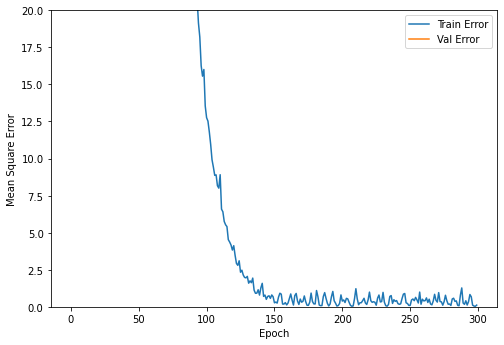

In [ ]:
EPOCHS = 300
history = rnn_model.fit(
  train_dataset, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,0.675996,0.704705,0.675996,660.065491,23.590590,660.065491,295
296,0.113191,0.273327,0.113191,667.921631,23.738091,667.921631,296
297,0.050777,0.179767,0.050777,670.077148,23.827953,670.077148,297
298,0.032428,0.147605,0.032428,663.208923,23.648727,663.208923,298
299,0.113791,0.267214,0.113791,690.799194,24.176525,690.799194,299


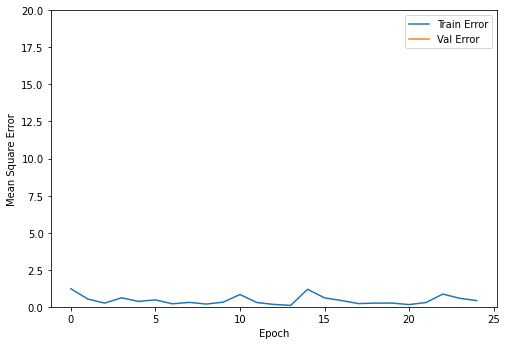

In [ ]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

EPOCHS = 1000
history = rnn_model.fit(train_dataset, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [ ]:
np.asarray(y_test)

array([101.2, 102.6, 102.9, 102.2, 101.5, 101. , 100.6,  99.9,  99.6,
        99.5,  99.8, 100.2, 100.5, 100.9, 101.4, 102.3, 103.3, 104. ,
       105.4, 106.3, 106.3, 107.1, 109.2, 111.6, 113.1, 114. , 115.6,
       118.3, 121.4, 124.9])

In [ ]:
## Test set
loss, mae, mse = rnn_model.evaluate(test_dataset,np.asarray(y_test) , verbose=2)

1/1 - 0s - loss: 1488.4146 - mae: 37.8749 - mse: 1488.4146


In [ ]:
y_pred = rnn_model.predict(test_dataset)

In [ ]:
y_pred

array([[68.00498 ],
       [68.48332 ],
       [67.87616 ],
       [67.51958 ],
       [65.25715 ],
       [66.932724],
       [69.40999 ],
       [68.72633 ],
       [68.901215],
       [66.382996],
       [68.8698  ],
       [68.66766 ],
       [67.14339 ],
       [65.22288 ],
       [70.86806 ],
       [70.39746 ],
       [68.72711 ],
       [67.426315],
       [68.729385],
       [71.07089 ],
       [71.16796 ],
       [66.347946],
       [67.1425  ],
       [65.58068 ],
       [67.29515 ],
       [70.06939 ],
       [64.3378  ],
       [68.97499 ],
       [67.85156 ],
       [66.9664  ]], dtype=float32)

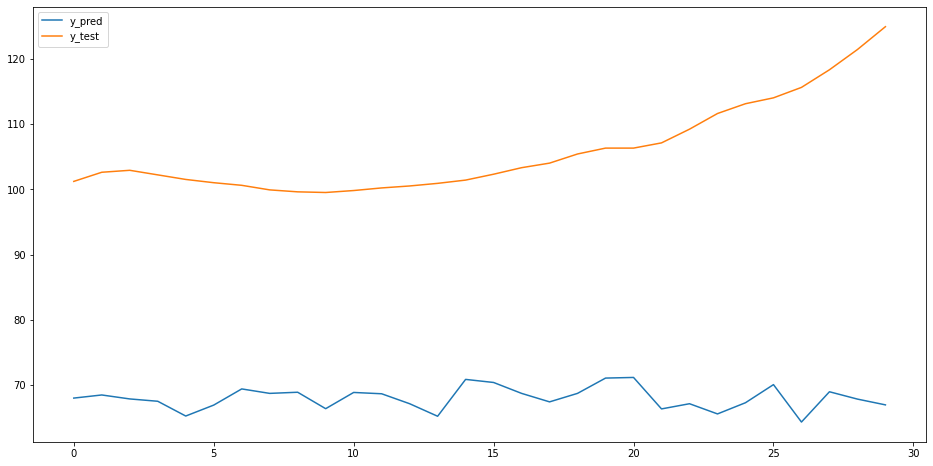

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_pred)
plt.plot(list(y_test))
plt.legend(['y_pred', 'y_test'])